***Covid-19 Impacts Analysis (Case Study)***

* The dataset are using to analyze the immpacts of covid-19 is downloaded from Kaggle. It contains
1. Country code
2.Name of the countries
3.Record date
4. Human development index
5. Daily cases 
6. Daily Deaths
7. Stringency index of country
8. Population of Country
9. GDP per capita of the countries

In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [8]:
#loading the data
df=pd.read_csv('transformed_data.csv')
df2=pd.read_csv('raw_data.csv')
df

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


****Data Preprocessing***

In [9]:
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491
50417,ZWE,Zimbabwe,2020-10-19,0.535,9.005405,5.442418,4.341855,16.514381,7.549491


In [10]:
df2.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [19]:
#checkling samples of each country 
df['COUNTRY'].value_counts()

COUNTRY
Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: count, Length: 210, dtype: int64

In [20]:
#checkling samples of each country 
df['COUNTRY'].value_counts().mode()

0    294
Name: count, dtype: int64

In [22]:
#aggregating the data

code=df['CODE'].unique().tolist()
country=df['COUNTRY'].unique().tolist()
human_dev=[]
t_cases=[]
t_deaths=[]
st_index=[]
population=df['POP'].unique().tolist()
gdp=[]

for i in country:
    human_dev.append((df.loc[df['COUNTRY']==i, 'HDI']).sum()/294)
    t_cases.append((df2.loc[df2['location']==i, 'total_cases']).sum())
    t_deaths.append((df2.loc[df2['location']==i, 'total_deaths']).sum())
    st_index.append((df.loc[df['COUNTRY']==i, 'STI']).sum())
    population.append((df2.loc[df2['location']==i, 'population']).sum()/294)

agg_data=pd.DataFrame(list(zip(code, country, human_dev, t_cases, t_deaths, st_index, population)),
                            columns=['Country Code', 'Country', 'HDI', 'Total Cases',
                                     'Total Deaths', 'Stringency Index', 'Population'])
agg_data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
0,AFG,Afghanistan,0.498000,5126433.0,165875.0,896.603996,17.477233
1,ALB,Albania,0.600765,1071951.0,31056.0,883.653354,14.872537
2,DZA,Algeria,0.754000,4893999.0,206429.0,939.379534,17.596309
3,AND,Andorra,0.659551,223576.0,9850.0,787.230267,11.254996
4,AGO,Angola,0.418952,304005.0,11820.0,871.874556,17.307957


In [25]:
#Sorting data According to Total Cases

df=agg_data.sort_values(by=['Total Cases'], ascending=False)
df.tail()


,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
204,VAT,Vatican,0.000000,2415.0,0.0,0.000000,6.695799
130,MSR,Montserrat,0.000000,2383.0,177.0,728.260497,8.516993
5,AIA,Anguilla,0.000000,614.0,0.0,683.897118,9.615939
173,SLB,Solomon Islands,0.007429,11.0,0.0,0.000000,13.439912
87,HKG,Hong Kong,0.161847,0.0,0.0,189.330221,15.830012


In [27]:
#Top 10 Countries with highest covid cases

df.head(10)

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.924000,746014098.0,26477574.0,985.178909,19.617637
27,BRA,Brazil,0.759000,425704517.0,14340567.0,921.992219,19.174732
90,IND,India,0.640000,407771615.0,7247327.0,1061.502322,21.045353
157,RUS,Russia,0.816000,132888951.0,2131571.0,993.745928,18.798668
150,PER,Peru,0.599490,74882695.0,3020038.0,1008.457173,17.311165
125,MEX,Mexico,0.774000,74347548.0,7295850.0,887.671085,18.674802
178,ESP,Spain,0.887969,73717676.0,5510624.0,997.813148,17.660427
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,989.113899,17.898266
42,COL,Colombia,0.581847,60543682.0,1936134.0,987.229375,17.745037
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,986.041643,18.033340


* adding the columns 1.GDP per capita before Covid-19, 2.GDP per capita during Covid-19
* the below GDP's are collected manually through internet

In [29]:
#adding two more columns to data

df['GDP before Covid']=[65279.53, 8897.49, 2100.75,
                       11497.65, 7027.61, 9946.03,
                       29564.74, 6001.40, 6424.98, 42354.41]
df['GDP During Covid']=[63543.58, 6796.84, 1900.71,
                       10126.72, 6126.87, 8346.70,
                       27057.16, 5090.72, 5332.77, 40284.64]

df

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP before Covid,GDP During Covid
200,USA,United States,0.924000,746014098.0,26477574.0,985.178909,19.617637,65279.53,63543.58
27,BRA,Brazil,0.759000,425704517.0,14340567.0,921.992219,19.174732,8897.49,6796.84
90,IND,India,0.640000,407771615.0,7247327.0,1061.502322,21.045353,2100.75,1900.71
157,RUS,Russia,0.816000,132888951.0,2131571.0,993.745928,18.798668,11497.65,10126.72
150,PER,Peru,0.599490,74882695.0,3020038.0,1008.457173,17.311165,7027.61,6126.87
125,MEX,Mexico,0.774000,74347548.0,7295850.0,887.671085,18.674802,9946.03,8346.70
178,ESP,Spain,0.887969,73717676.0,5510624.0,997.813148,17.660427,29564.74,27057.16
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,989.113899,17.898266,6001.40,5090.72
42,COL,Colombia,0.581847,60543682.0,1936134.0,987.229375,17.745037,6424.98,5332.77
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,986.041643,18.033340,42354.41,40284.64


***Analysis***

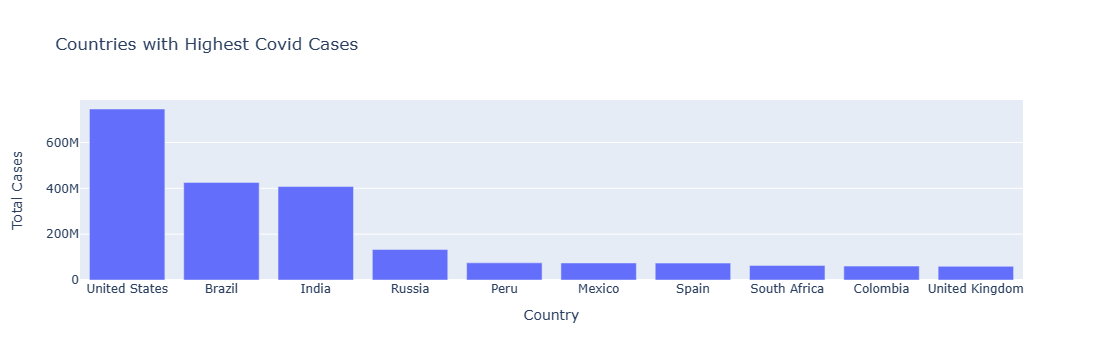

In [35]:
#countries with highest covid-19 cases

fig=px.bar(df, y='Total Cases', x='Country', title='Countries with Highest Covid Cases')
fig.show()

* From the above graph among the top 10 countries, US, Brazil, India, Russia are on top 4 according to Covid-19 Cases

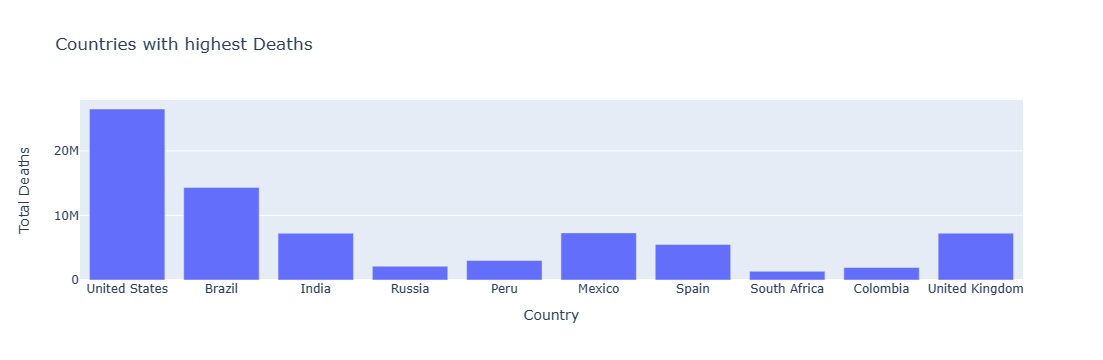

In [40]:
#Counntries with Highest Deaths in Covid-19

fig=px.bar(df, x='Country', y='Total Deaths', title='Countries with highest Deaths')
fig.show()

* From the above graph India, Russia, South Africa  are comparatively according Covid-19 Cases and Population

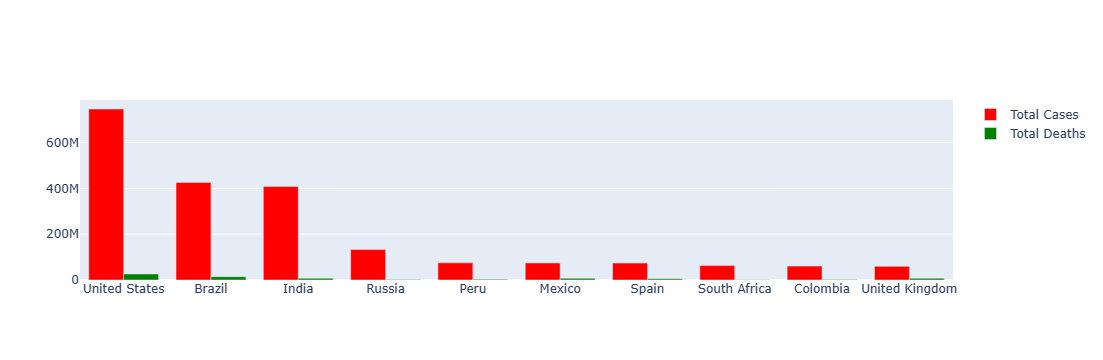

In [53]:
#Comparision between Total no.of Cases Vs Total Deaths in all these countries

fig=go.Figure()
fig.add_trace(go.Bar(
    x=df['Country'],
    y=df['Total Cases'],
    name='Total Cases',
    marker_color='red'
))

fig.add_trace(go.Bar(
    x=df['Country'],
    y=df['Total Deaths'],
    name='Total Deaths',
    marker_color='green'
))

fig.update_layout(barmode='group')
fig.show()

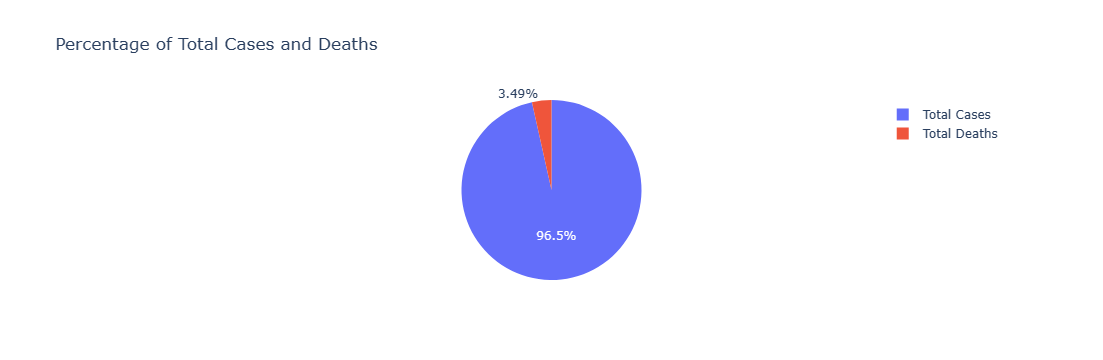

In [56]:
#Percentage of Total Deaths and Total Cases among the top 10 countries

c=df['Total Cases'].sum()
d=df['Total Deaths'].sum()

labels=['Total Cases', 'Total Deaths']
values=[c, d]
fig=px.pie(df, values=values, names=labels,title='Percentage of Total Cases and Deaths')

fig.show()

In [57]:
#calculation of death rate

death_rate=(df['Total Deaths'].sum()/ df['Total Cases'].sum())*100
print('Death Rate: ', death_rate)

Death Rate:  3.6144212045653767


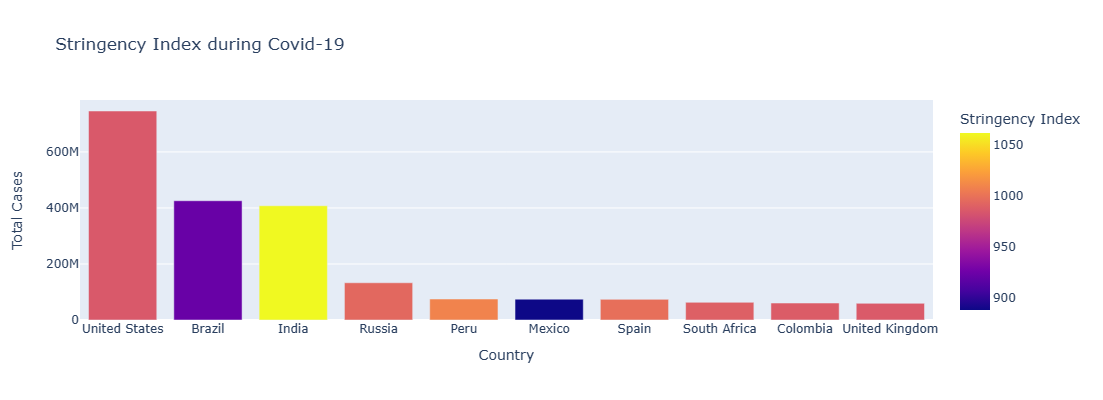

In [84]:
#Stringency Index During 

fig=px.bar(df,x='Country', y='Total Cases',
           hover_data=['Population', 'Total Deaths'],
           color='Stringency Index',height=400,
           title='Stringency Index during Covid-19')
    

fig.show()

* India is performing well in the stringency index during the outbreak of Covid-19

***Analyzing Covid-19 Impacts on Economy***

* GDP per capita is the Primary factor for analyzing the economic slowdowns caused due to the outbreak of covid-19.

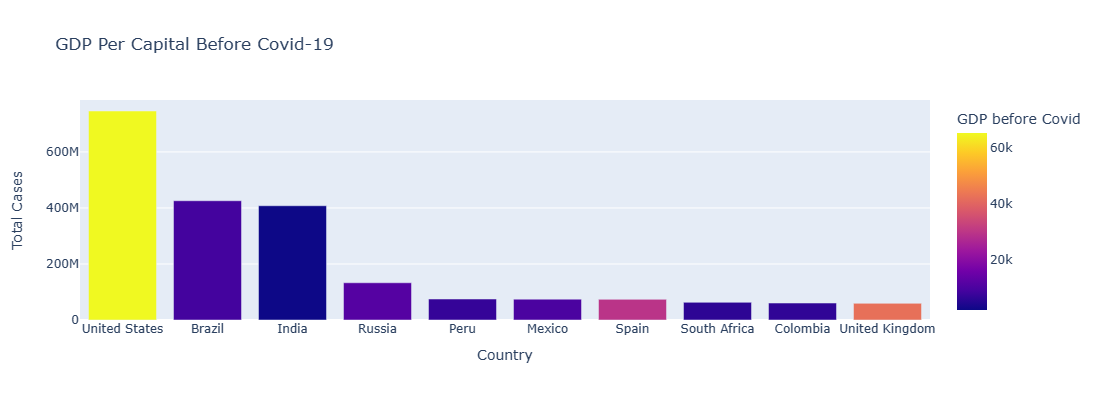

In [89]:
#GDP per capita before covid-19

fig=px.bar(df, x='Country', y='Total Cases',
          hover_data=['Population', 'Total Deaths'],
          color='GDP before Covid', height=400,
          title='GDP Per Capital Before Covid-19')
fig.show()

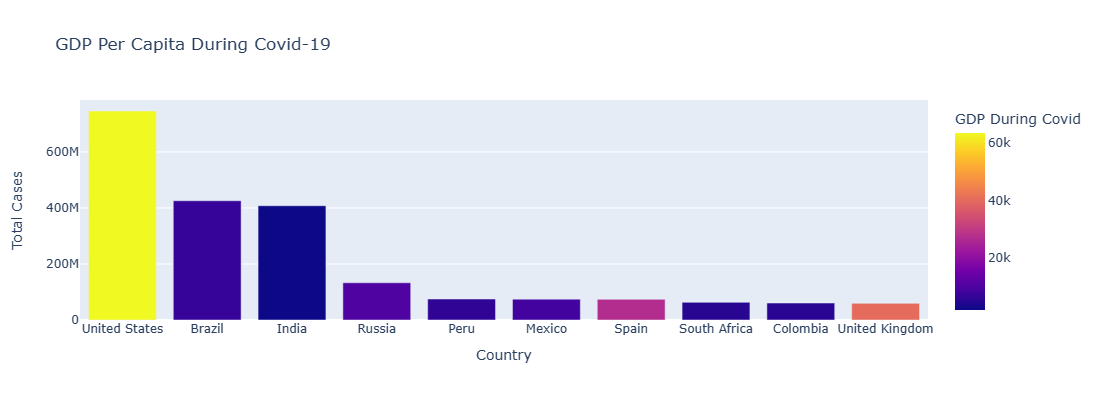

In [92]:
#GDP per capita during the rise in the cases of covid-19

fig=px.bar(df, x='Country', y='Total Cases',
          hover_data=['Population','Total Deaths'],
          color='GDP During Covid', height=400,
          title='GDP Per Capita During Covid-19')

fig.show()

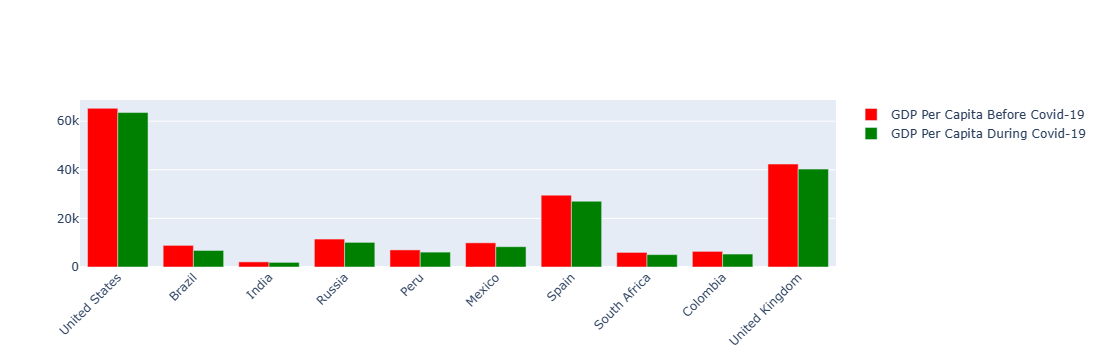

In [96]:
#Comparision between GDP per capita before covid-19 VS during covid-19

fig=go.Figure()
fig.add_traces(go.Bar(
    x=df['Country'], y=df['GDP before Covid'],
    name='GDP Per Capita Before Covid-19',
    marker_color='red'            
))

fig.add_traces(go.Bar(
    x=df['Country'],
    y=df['GDP During Covid'],
    name='GDP Per Capita During Covid-19',
    marker_color='green'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

* in this graph we can see that there is a drop in GDP Per Capita in all the countries with highest number of covid-19 cases

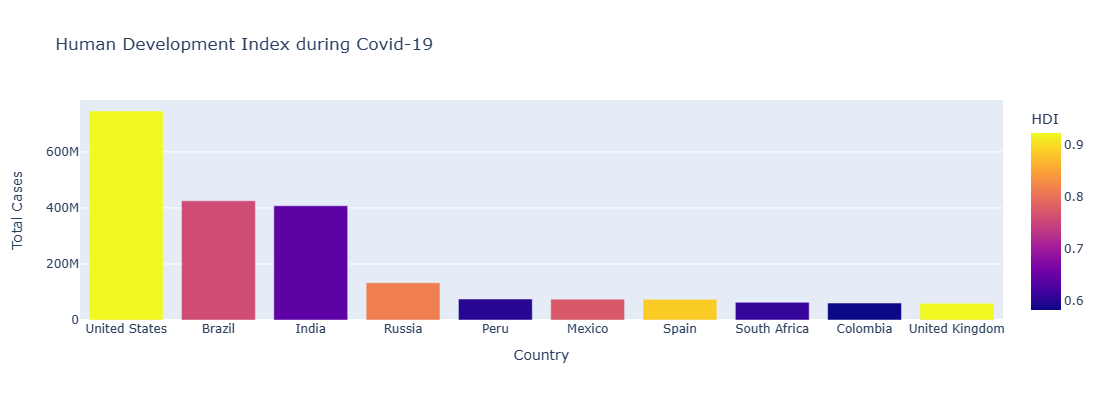

In [97]:
#Human Development Index During Covid-19

fig=px.bar(df, x='Country', y='Total Cases',
          hover_data=['Population','Total Deaths'],
          color='HDI', height=400,
          title='Human Development Index during Covid-19')
fig.show()

***Conclusion***

* We studied the spread of Covid-19 pandemic among the countries and it's impact on global economy
* from the analysis we found that highest number of covid-19 cases and deaths in United States.
* One major reason is, Stringency index of United States is comparatively low according to the population
* GDP per capita of every country was affected during the covid-19 